# Chapter 6. Summarized Data Distributions

In [1]:
options(repr.plot.width = 8, repr.plot.height = 6)
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## 6.1 Making a Basic Histogram

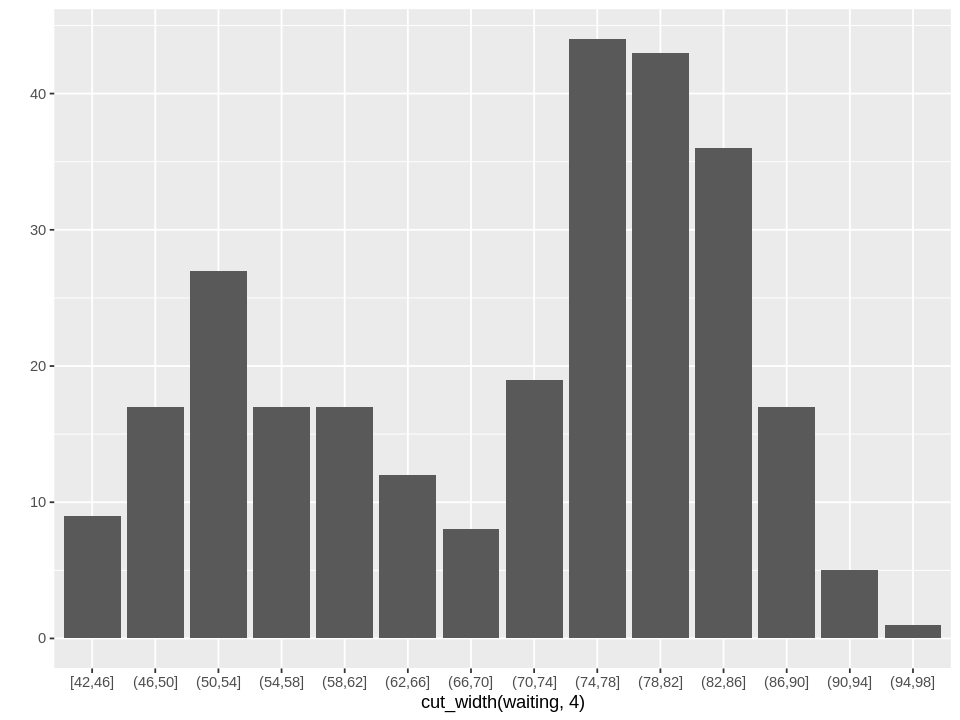

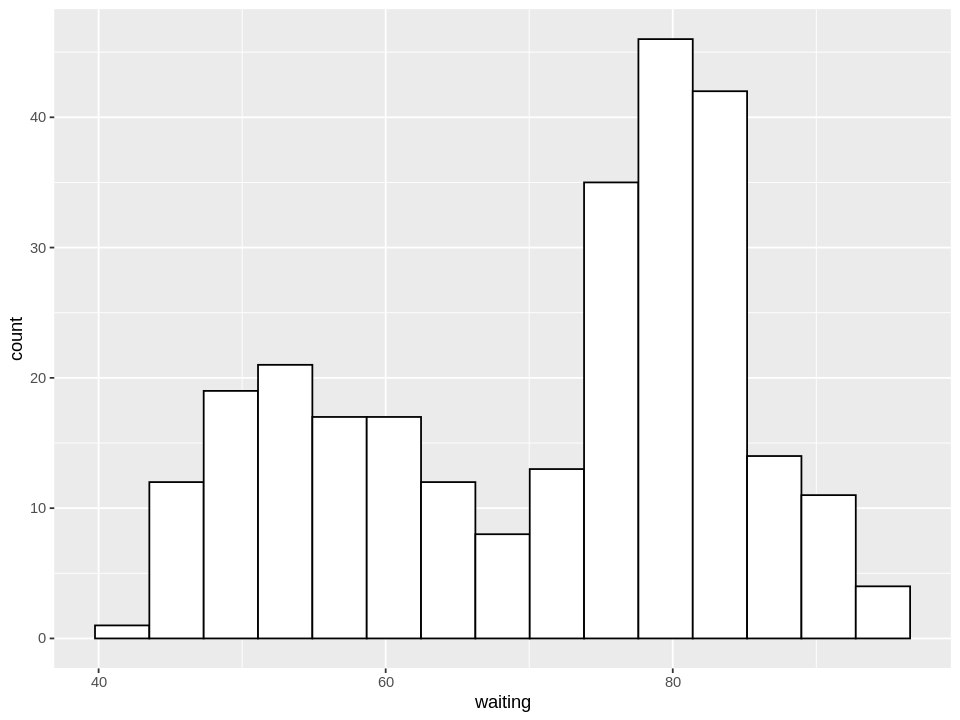

In [2]:
qplot(cut_width(waiting, 4), data = faithful, geom = "bar")
ggplot(faithful, aes(waiting)) + geom_histogram(bins = 15, color = "black", fill = "white")

> Sometimes the appearance of the histogram will be very dependent on the width of the bins and where the boundary points between the bins are.

> The `faithful` data set is not particularly small, with 272 observations; with smaller data sets, this can be even more of an issue. When visualizing your data, it’s a good idea to experiment with different bin sizes and boundary points.

> If your data has discrete values, it may matter that the histogram bins are asymmetrical. They are *closed* on the lower bound and *open* on the upper bound.

> Frequency polygons provide a better way of visualizing multiple distributions without the bars interfering with each other.

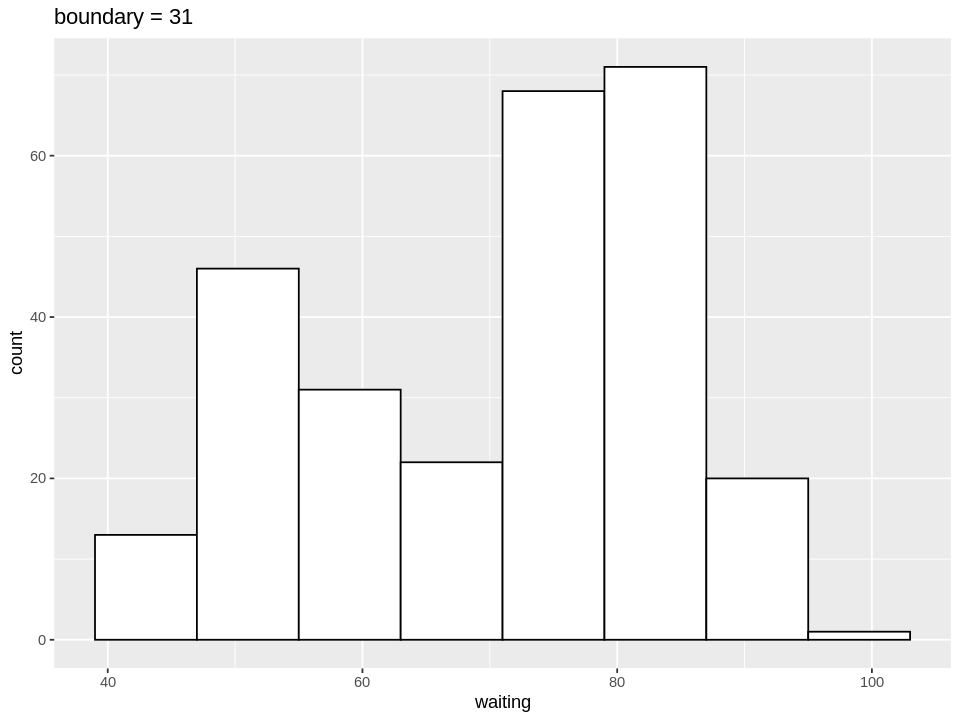

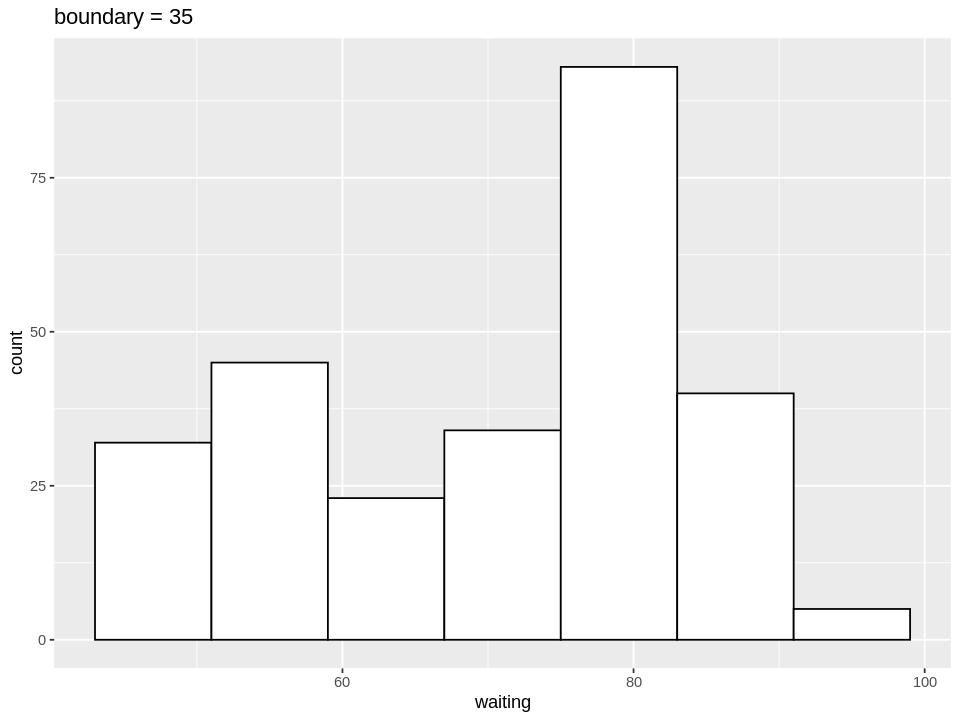

In [3]:
for (boundary in c(31, 35)) {
  print(
    ggplot(faithful, aes(waiting)) +
      geom_histogram(binwidth = 8, boundary = boundary, color = "black", fill = "white") +
      ggtitle(str_interp("boundary = ${boundary}"))
  )
}

## 6.2 Making Multiple Histograms from Grouped Data

In [4]:
summary(MASS::birthwt)
slice_sample(MASS::birthwt, n = 10)
?MASS::birthwt

      low              age             lwt             race      
 Min.   :0.0000   Min.   :14.00   Min.   : 80.0   Min.   :1.000  
 1st Qu.:0.0000   1st Qu.:19.00   1st Qu.:110.0   1st Qu.:1.000  
 Median :0.0000   Median :23.00   Median :121.0   Median :1.000  
 Mean   :0.3122   Mean   :23.24   Mean   :129.8   Mean   :1.847  
 3rd Qu.:1.0000   3rd Qu.:26.00   3rd Qu.:140.0   3rd Qu.:3.000  
 Max.   :1.0000   Max.   :45.00   Max.   :250.0   Max.   :3.000  
     smoke             ptl               ht                ui        
 Min.   :0.0000   Min.   :0.0000   Min.   :0.00000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.00000   1st Qu.:0.0000  
 Median :0.0000   Median :0.0000   Median :0.00000   Median :0.0000  
 Mean   :0.3915   Mean   :0.1958   Mean   :0.06349   Mean   :0.1481  
 3rd Qu.:1.0000   3rd Qu.:0.0000   3rd Qu.:0.00000   3rd Qu.:0.0000  
 Max.   :1.0000   Max.   :3.0000   Max.   :1.00000   Max.   :1.0000  
      ftv              bwt      
 Min.   :0.0000

,low,age,lwt,race,smoke,ptl,ht,ui,ftv,bwt
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
145,0,30,153,3,0,0,0,0,0,3203
154,0,26,133,3,1,2,0,0,0,3260
164,0,23,115,3,1,0,0,0,1,3331
43,1,27,130,2,0,0,0,1,0,2187
161,0,22,158,2,0,1,0,0,2,3317
96,0,19,95,3,0,0,0,0,0,2722
4,1,28,120,3,1,1,0,1,0,709
49,1,18,148,3,0,0,0,0,0,2282
190,0,29,135,1,0,0,0,0,1,3651


birthwt {MASS},R Documentation


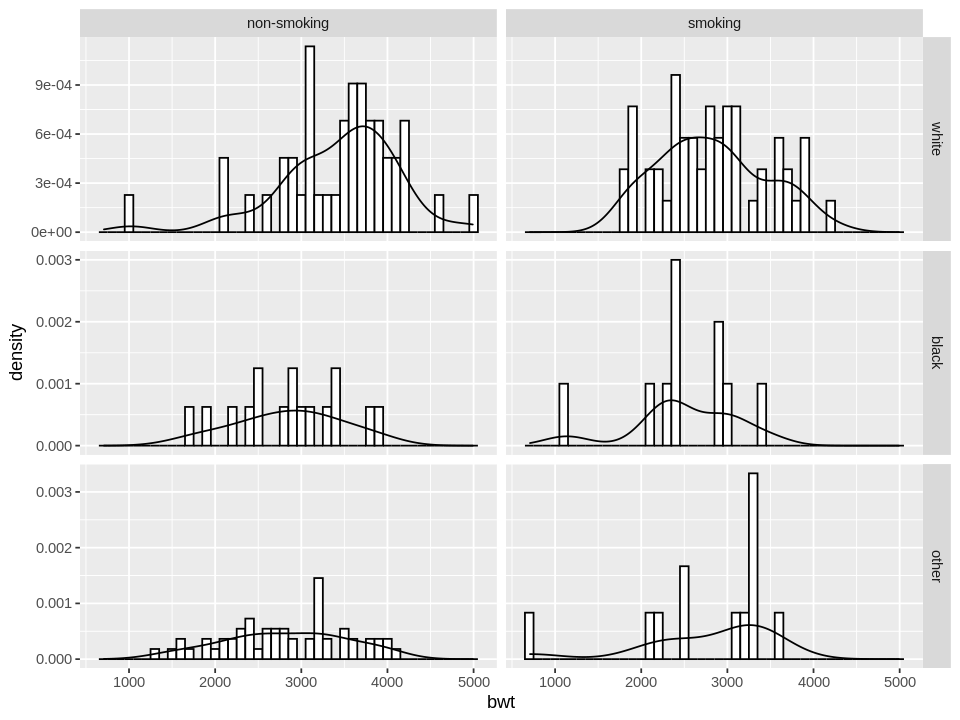

In [5]:
ggplot(MASS::birthwt, aes(bwt, ..density..)) +
  geom_histogram(binwidth = 100, color = "black", fill = "white") +
  geom_density() +
  facet_grid(
    labeller = labeller(
      race = c("1" = "white", "2" = "black", "3" = "other"),
      smoke = c("0" = "non-smoking", "1" = "smoking")
    ),
    rows = race ~ smoke,
    scale = "free_y"
  )

## 6.3 Making a Density Curve

> You want to make a kernel density estimate curve.

> A kernel density curve is an estimate of the population distribution, based on the sample data. The amount of smoothing depends on the *kernel bandwidth*: the larger the bandwidth, the more smoothing there is.

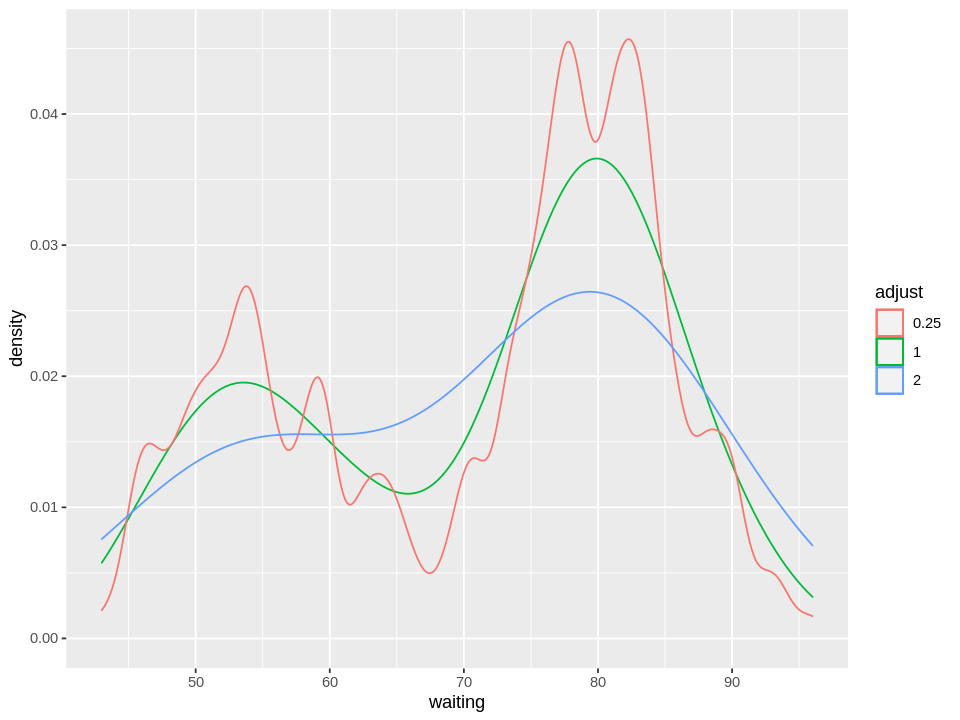

In [6]:
reduce(
  list(formals(stat_density)$adjust, .25, 2),
  .init = ggplot(faithful, aes(waiting)),
  .f = function(plot, adjust) {
    plot +
      geom_density(aes(color = str_c(adjust)), adjust = adjust) +
      labs(color = "adjust")
  }
)

> If this edge-clipping happens with your data, it might mean that your curve is too smooth. If the curve is much wider than your data, it might not be the best model of your data, or it could be because you have a small data set.

> To compare the theoretical and observed distributions of your data, you can overlay the density curve with the histogram.

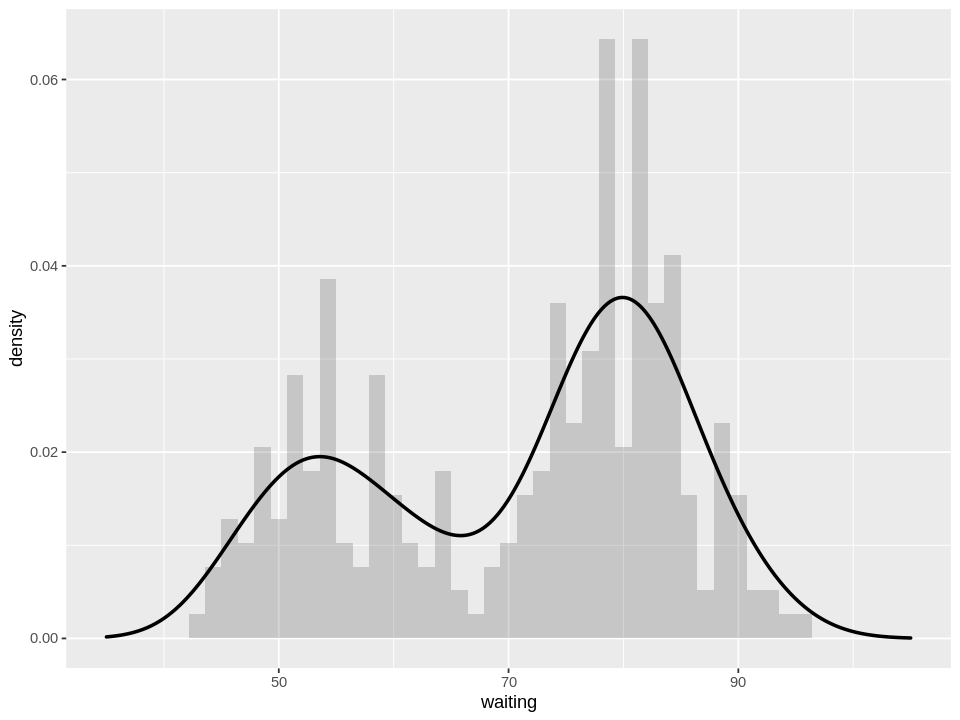

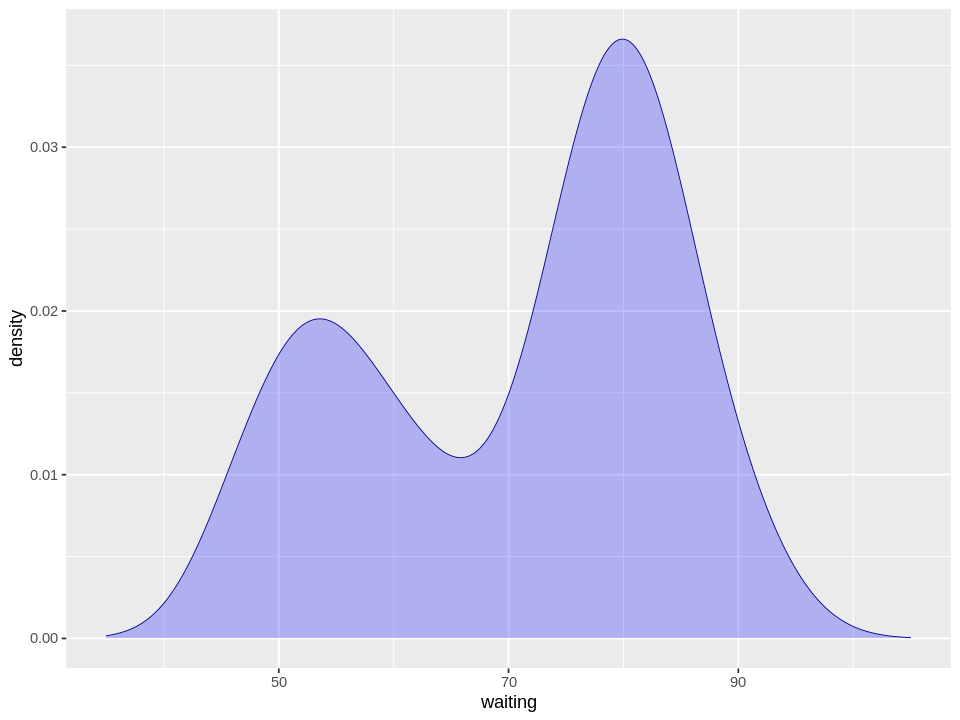

In [7]:
ggplot(faithful, aes(waiting)) +
  geom_histogram(aes(y = ..density..), alpha = .25, bins = 50) +
  geom_density(size = 1) +
  xlim(35, 105)

ggplot(faithful, aes(waiting)) +
  geom_density(alpha = .25, color = "darkblue", fill = "blue", size = .25) +
  xlim(35, 105)

## 6.4 Making Multiple Density Curves from Grouped Data

> If you want to see the histograms along with the density curves, the best option is to use facets, since other methods of visualizing both histograms in a single graph can be difficult to interpret.

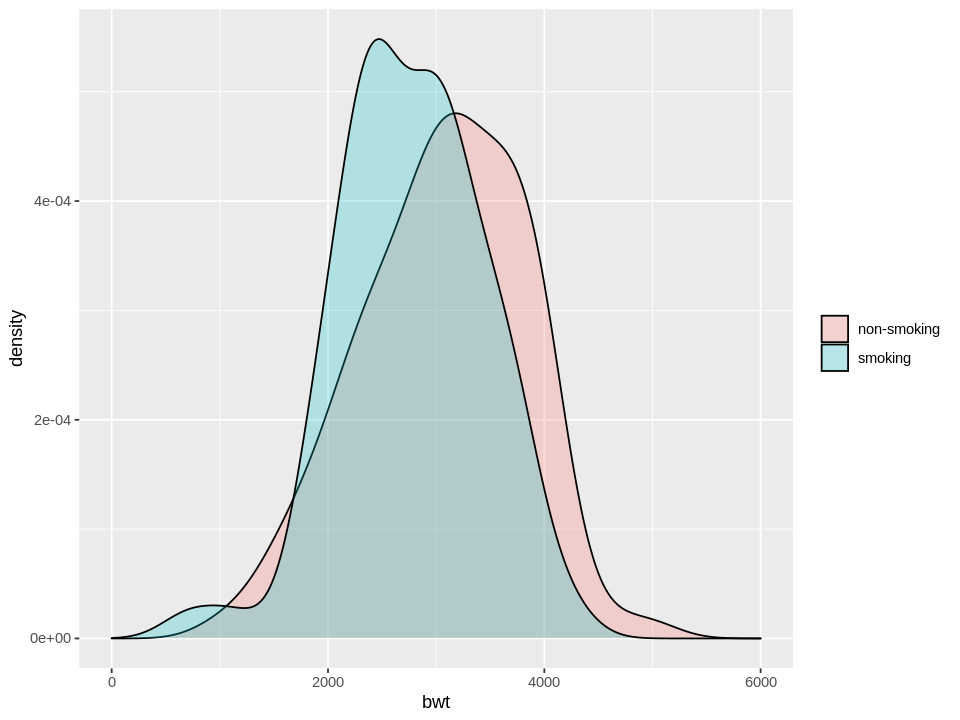

In [8]:
ggplot(MASS::birthwt, aes(bwt, fill = recode(smoke, "0" = "non-smoking", "1" = "smoking"))) +
  geom_density(alpha = .25) +
  labs(fill = NULL) +
  xlim(0, 6000)

## 6.5 Making a Frequency Polygon

> A frequency polygon appears similar to a kernel density estimate curve, but it shows the same information as a histogram. That is, like a histogram, it shows what is in the data, whereas a kernel density estimate is just that—an estimate—and requires you to pick some value for the bandwidth.

> Histograms display the same information, but with bars instead of lines.

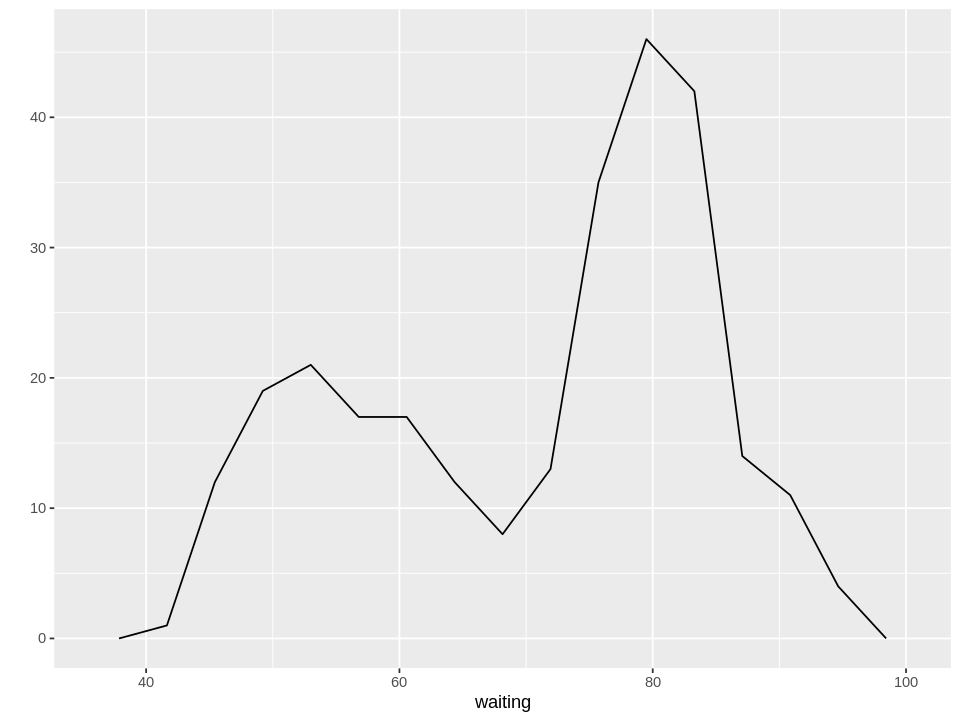

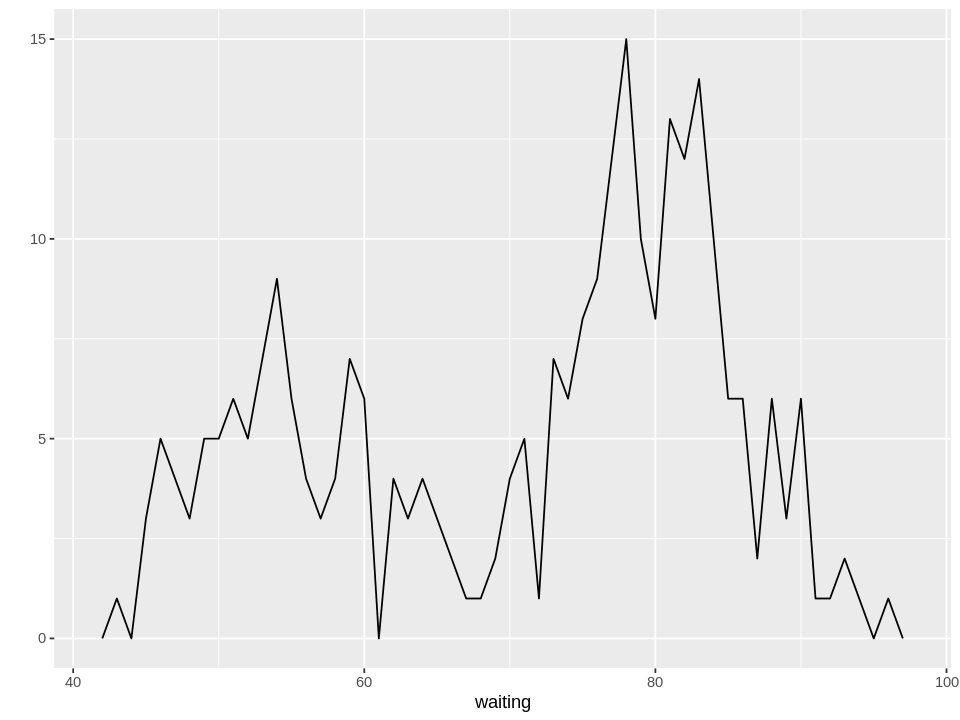

In [9]:
qplot(waiting, data = faithful, geom = "freqpoly", bins = 15)
qplot(waiting, data = faithful, geom = "freqpoly", binwidth = 1)

## 6.6 Making a Basic Box Plot

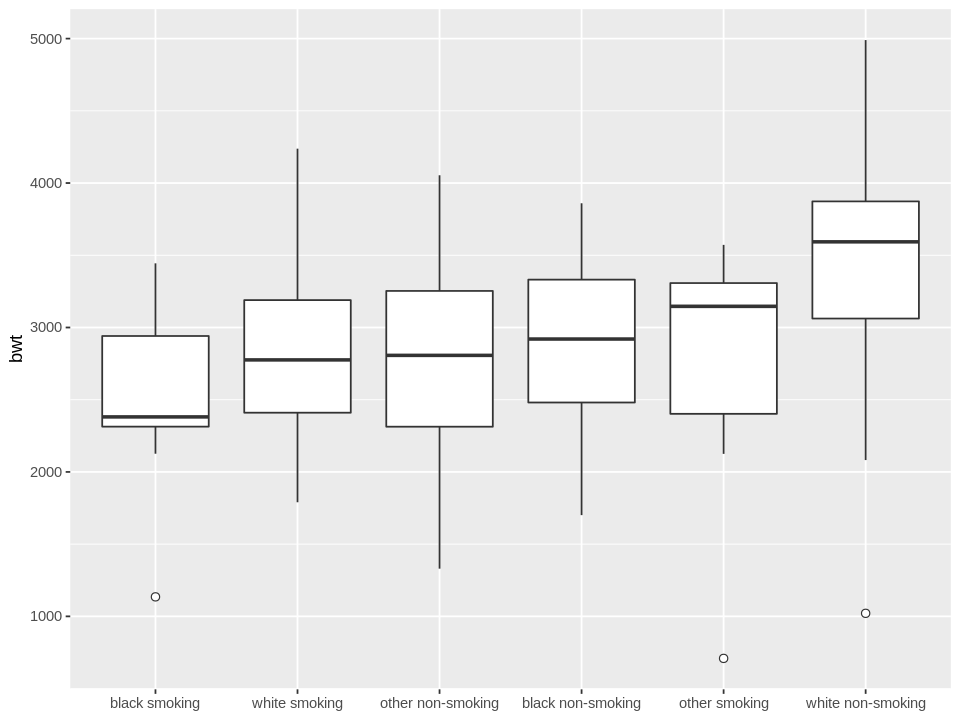

In [10]:
ggplot(data = MASS::birthwt) +
  geom_boxplot(
    aes(
      x = reorder(
        interaction(
          recode(race, "1" = "white", "2" = "black", "3" = "other"),
          recode(smoke, "0" = "non-smoking", "1" = "smoking"),
          sep = " "
        ),
        bwt,
        FUN = median
      ),
      y = bwt
    ),
    outlier.shape = 21,
    outlier.size = 2,
  ) +
  labs(x = NULL)

## 6.7 Adding Notches to a Box Plot

> Notches are used in box plots to help visually assess whether the medians of distributions differ. If the notches do not overlap, this is evidence that the medians are different.

> With this particular data set, you’ll see the following message:
>
> `Notch went outside hinges. Try setting notch=FALSE.`
>
> This means that the confidence region (the notch) went past the bounds (or hinges) of one of the boxes. In this case, the upper part of the notch in the middle box goes just barely outside the box body, but it’s by such a small amount that you can’t see it in the final output. There’s nothing inherently wrong with a notch going outside the hinges, but it can look strange in more extreme cases.

notch went outside hinges. Try setting notch=FALSE.



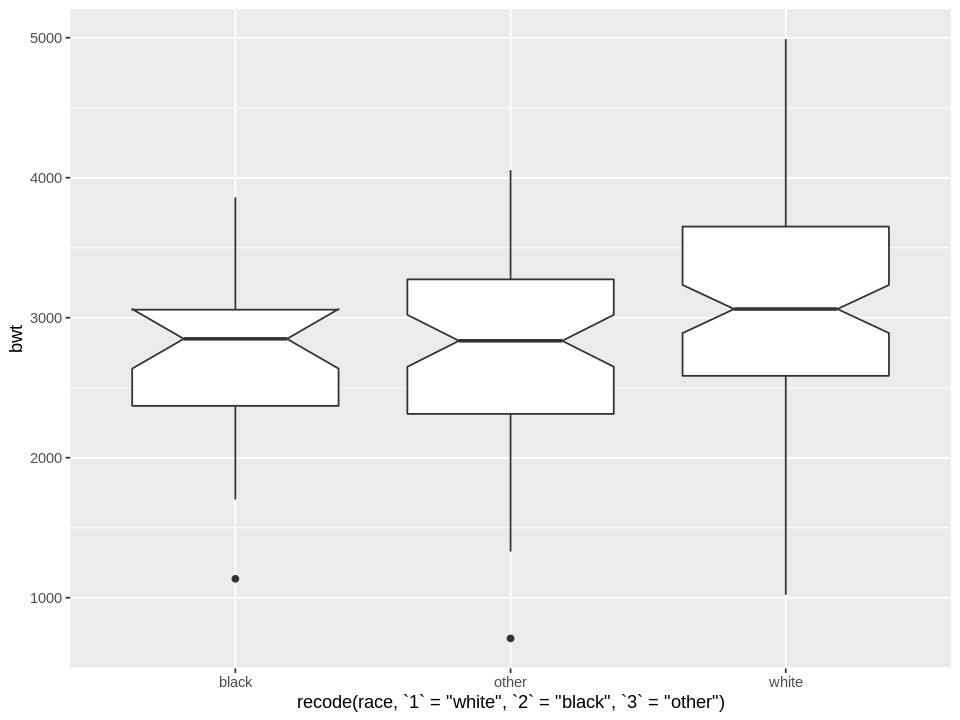

In [11]:
ggplot(MASS::birthwt, aes(
  recode(race, "1" = "white", "2" = "black", "3" = "other"),
  bwt
)) + geom_boxplot(notch = TRUE)

## 6.8 Adding Means to a Box Plot

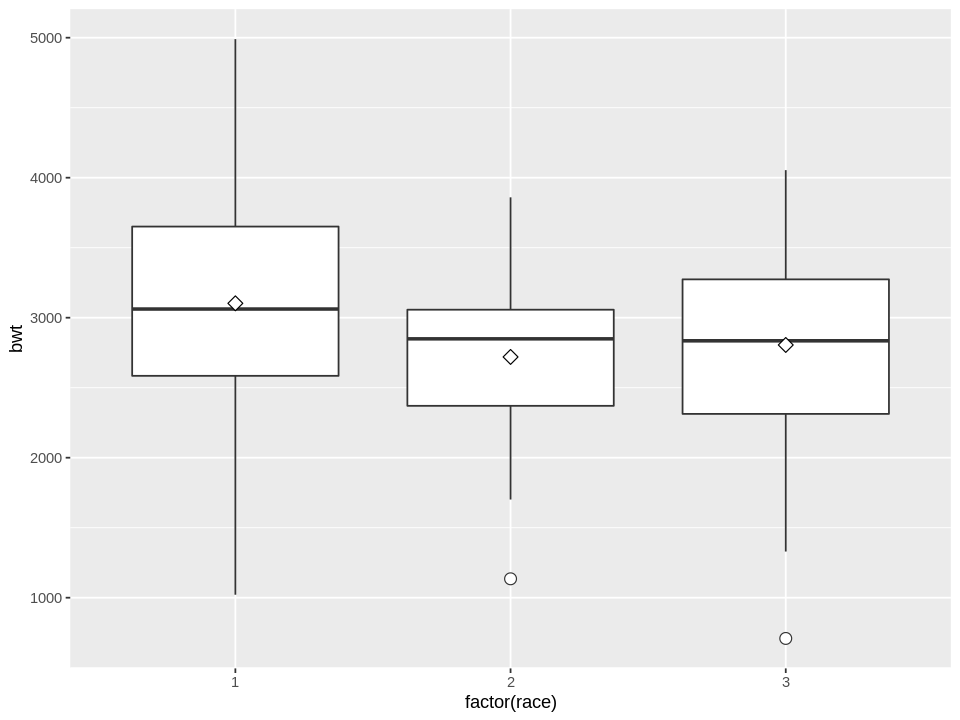

In [12]:
qplot(factor(race), bwt, data = MASS::birthwt, geom = "boxplot", outlier.shape = 21, outlier.size = 3) +
  stat_summary(fill = "white", fun = mean, geom = "point", shape = 23, size = 3)

## 6.9 Making a Violin Plot

> You want to make a violin plot to compare density estimates of different groups.

> Violin plots are a way of comparing multiple data distributions. With ordinary density curves, it is difficult to compare more than just a few distributions because the lines visually interfere with each other. With a violin plot, it’s easier to compare several distributions since they’re placed side by side.

> A violin plot is a kernel density estimate, mirrored so that it forms a symmetrical shape. Traditionally, they also have narrow box plots overlaid, with a white dot at the median. Additionally, the box plot outliers are not displayed.

> By default, the violins are scaled so that the total area of each one is the same (if `trim = TRUE`, then it scales what the area *would be* including the tails). Instead of equal areas, you can use `scale = "count"` to scale the areas proportionally to the number of observations in each group.

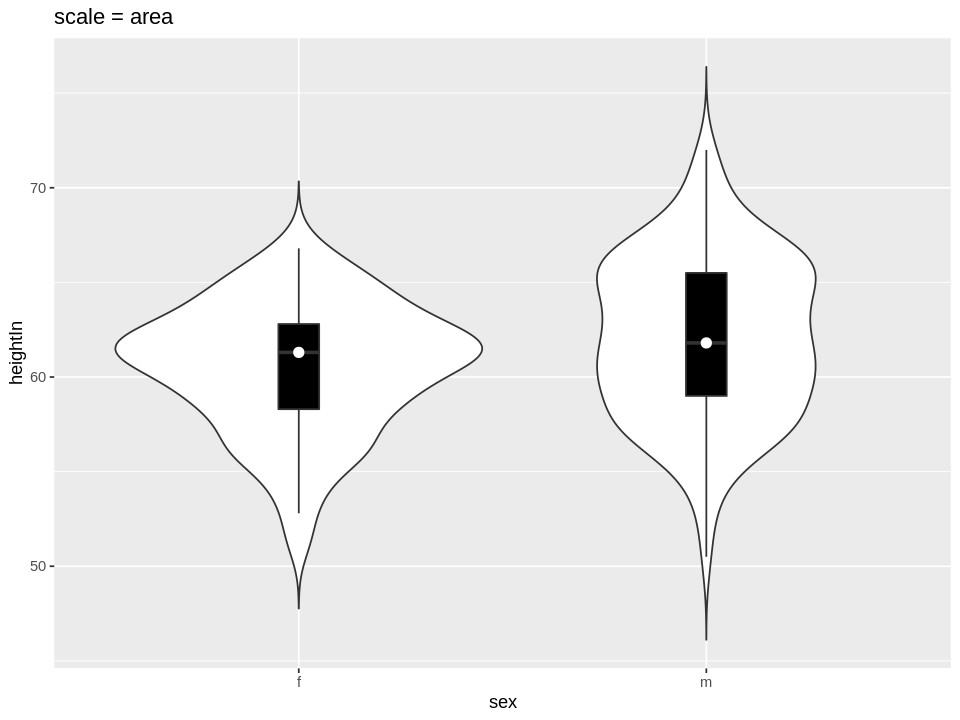

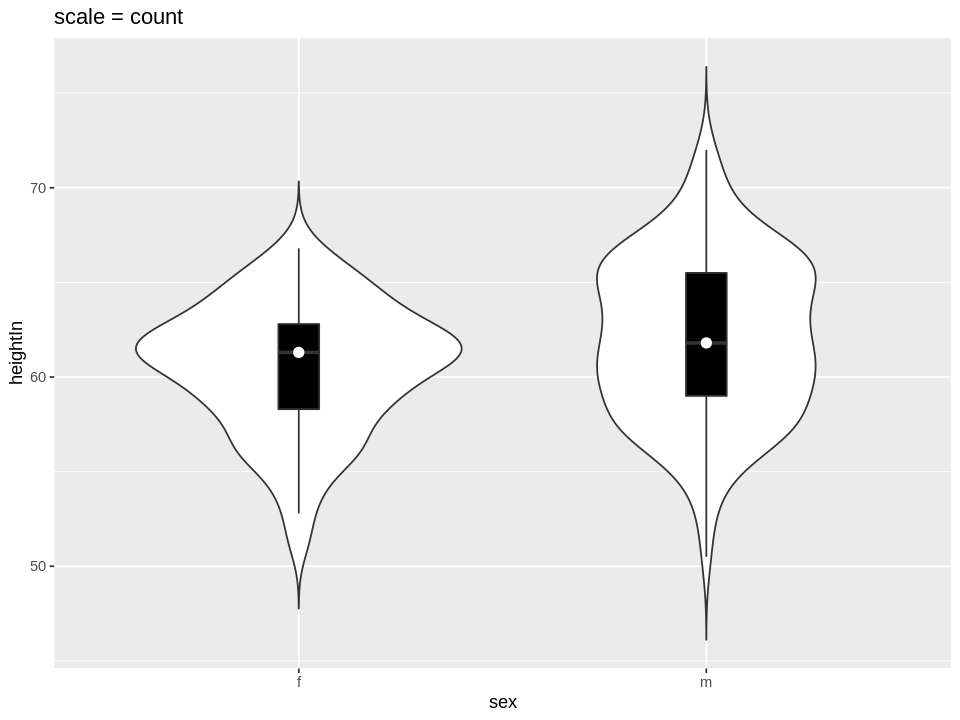

In [13]:
for (scale in c(formals(geom_violin)$scale, "count")) {
  print(
    ggplot(gcookbook::heightweight, aes(sex, heightIn)) +
      geom_violin(scale = scale, trim = FALSE) +
      geom_boxplot(fill = "black", outlier.color = NA, width = .1) +
      stat_summary(color = "white", fun = median, geom = "point", size = 2.5) +
      ggtitle(str_interp("scale = ${scale}"))
  )
}

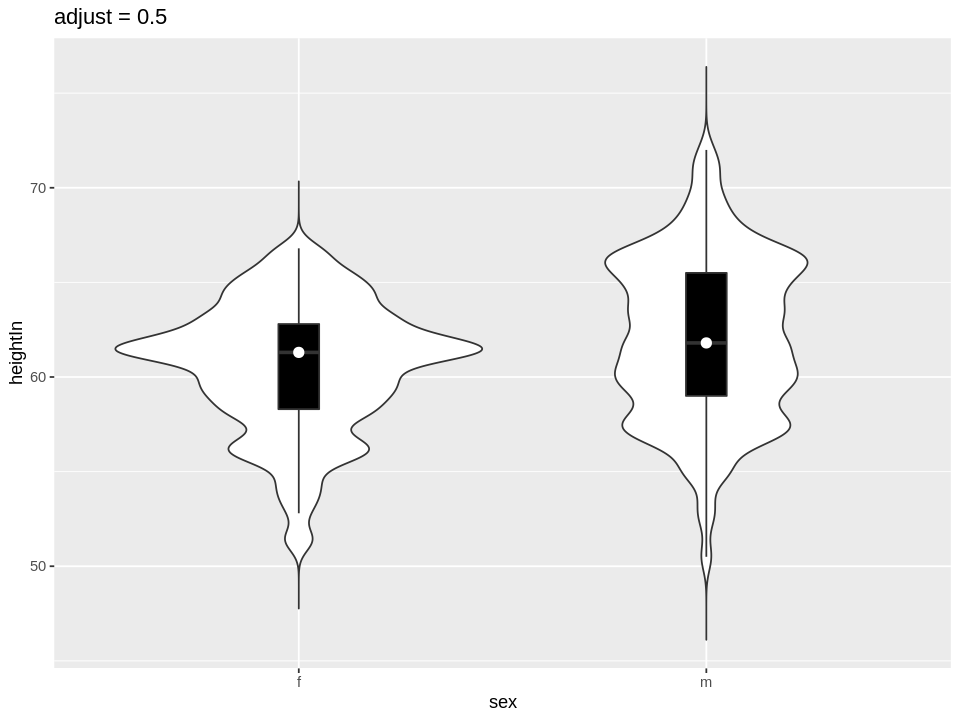

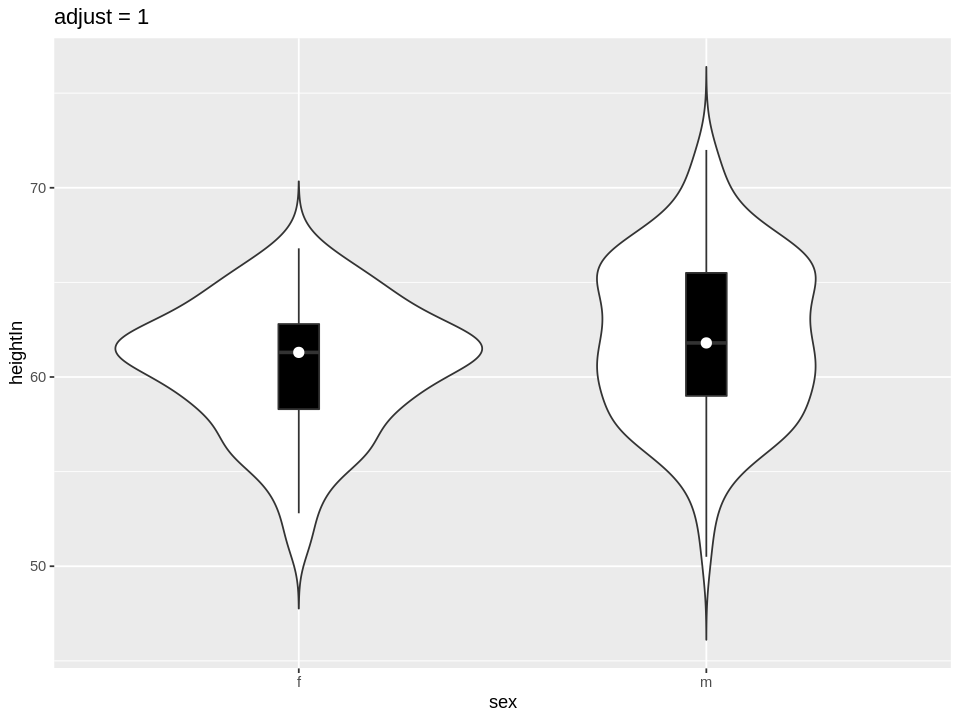

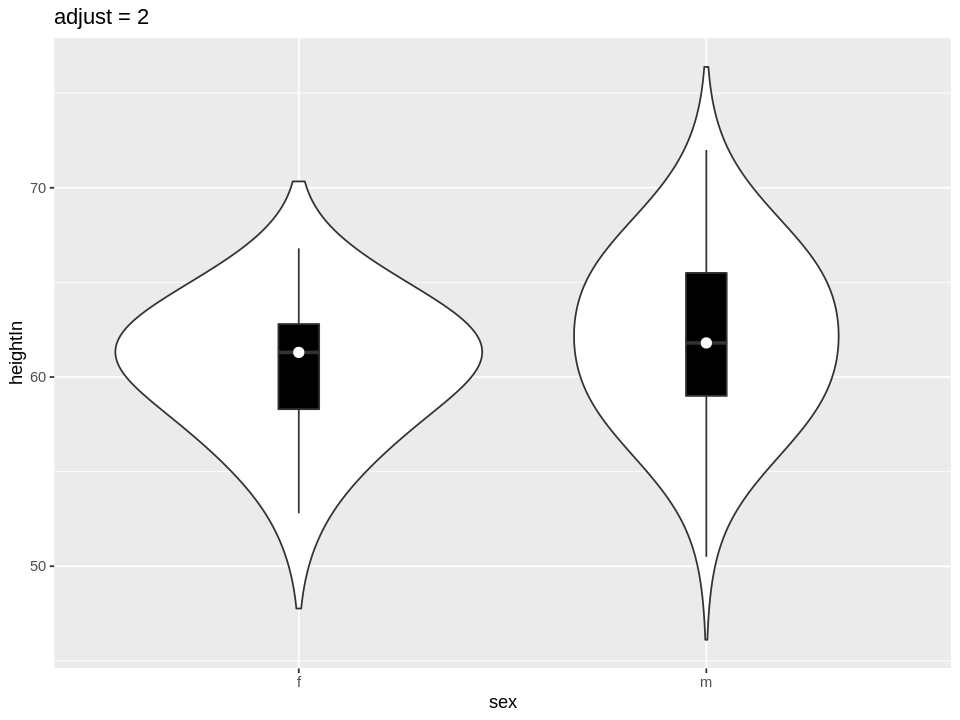

In [14]:
for (adjust in c(.5, 1, 2)) {
  print(
    ggplot(gcookbook::heightweight, aes(sex, heightIn)) +
      geom_violin(adjust = adjust, trim = FALSE) +
      geom_boxplot(fill = "black", outlier.color = NA, width = .1) +
      stat_summary(color = "white", fun = median, geom = "point", size = 2.5) +
      ggtitle(str_interp("adjust = ${adjust}"))
  )
}

## 6.10 Making a Dot Plot

> This kind of dot plot is sometimes called a *Wilkinson* dot plot. It’s different from the Cleveland dot plots. In these Wilkinson dot plots, the placement of the bins depends on the data, and the width of each dot corresponds to the maximum width of each bin. 

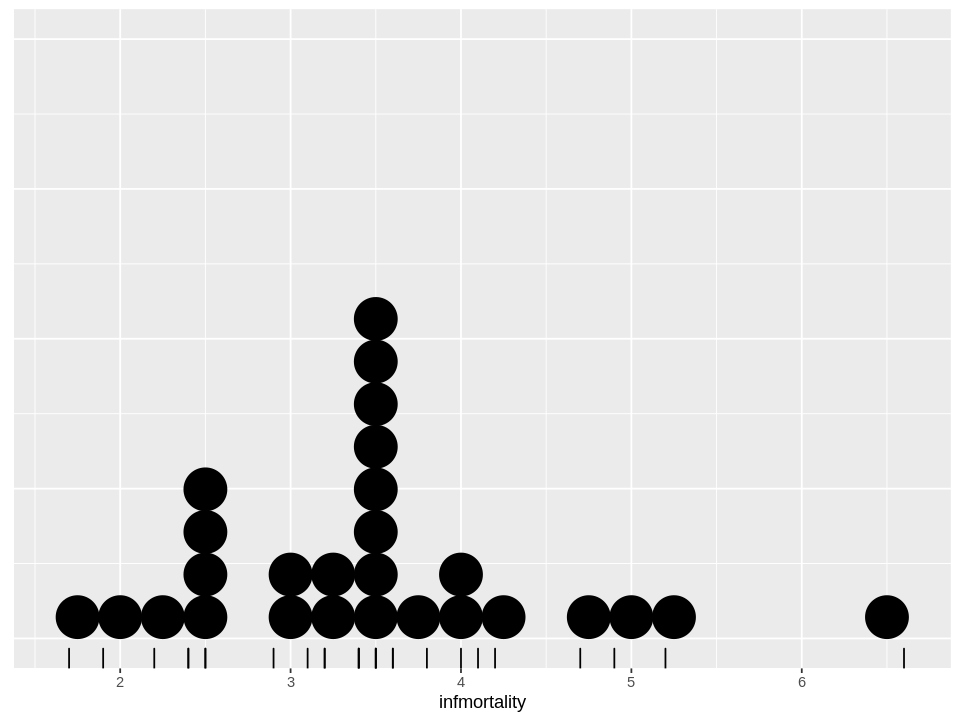

In [15]:
filter(gcookbook::countries, Year == 2009, healthexp > 2000) %>%
  ggplot(aes(infmortality)) +
  geom_dotplot(binwidth = .25, method = "histodot") +
  geom_rug() +
  theme(axis.ticks.y = element_blank(), axis.text.y = element_blank()) +
  labs(y = NULL)

## 6.11 Making Multiple Dot Plots for Grouped Data

> Dot plots are sometimes overlaid on box plots.

> It’s also possible to show the dot plots next to the box plots.

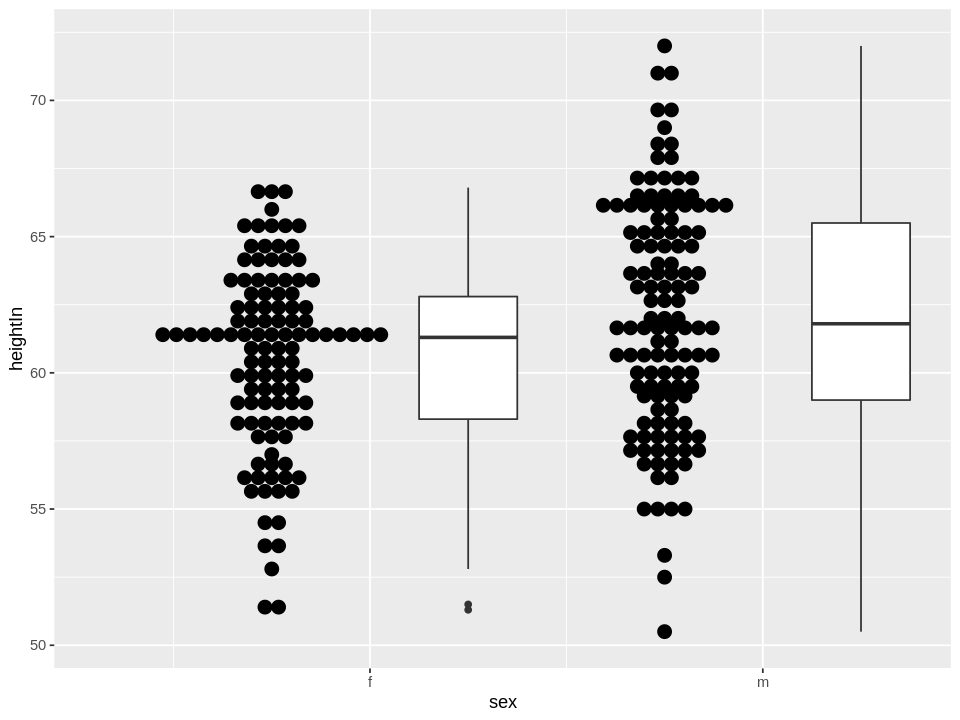

In [16]:
ggplot(gcookbook::heightweight, aes(sex, heightIn)) +
  geom_dotplot(aes(as.numeric(sex) - .25, group = sex), binaxis = "y", binwidth = .5, stackdir = "center") +
  geom_boxplot(aes(as.numeric(sex) + .25, group = sex), width = .25) +
  scale_x_continuous(
    breaks = 1:nlevels(gcookbook::heightweight$sex),
    labels = levels(gcookbook::heightweight$sex)
  )

## 6.12 Making a Density Plot of Two-Dimensional Data

> This makes a 2D kernel density estimate from the data.

> The default is to use contour lines, but it’s also possible to use tiles and to map the density estimate to the fill color, or to the transparency of the tiles.

> We used `geom = "raster"` in the first of the preceding examples and `geom = "tile"` in the second. The main difference is that the raster geom renders more efficiently than the tile geom. In theory, they *should* appear the same, but in practice they often do not. If you are writing to a PDF file, the appearance depends on the PDF viewer. On some viewers, when tile is used there may be faint lines between the tiles, and when raster is used the edges of the tiles may appear blurry (although it doesn’t matter in this particular case).

> As with the one-dimensional density estimate, you can control the bandwidth of the estimate.

> The relationship between `stat_density2d()` and `stat_bin2d()` is the same as the relationship between their one-dimensional counterparts, the density curve and the histogram. The density curve is an *estimate* of the distribution under certain assumptions, while the binned visualization represents the observed data directly.

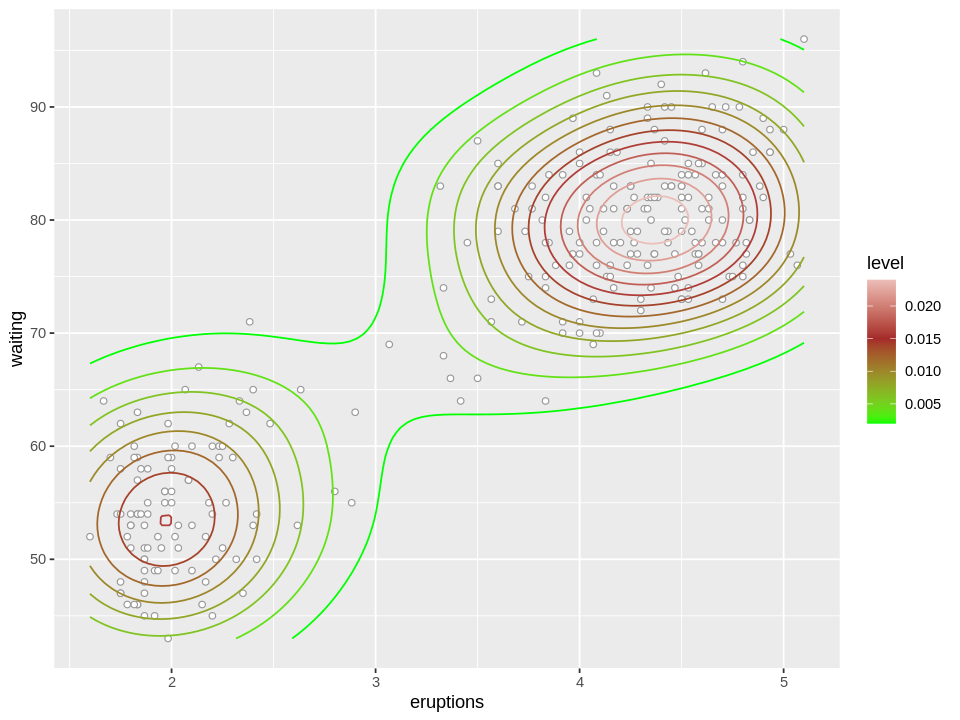

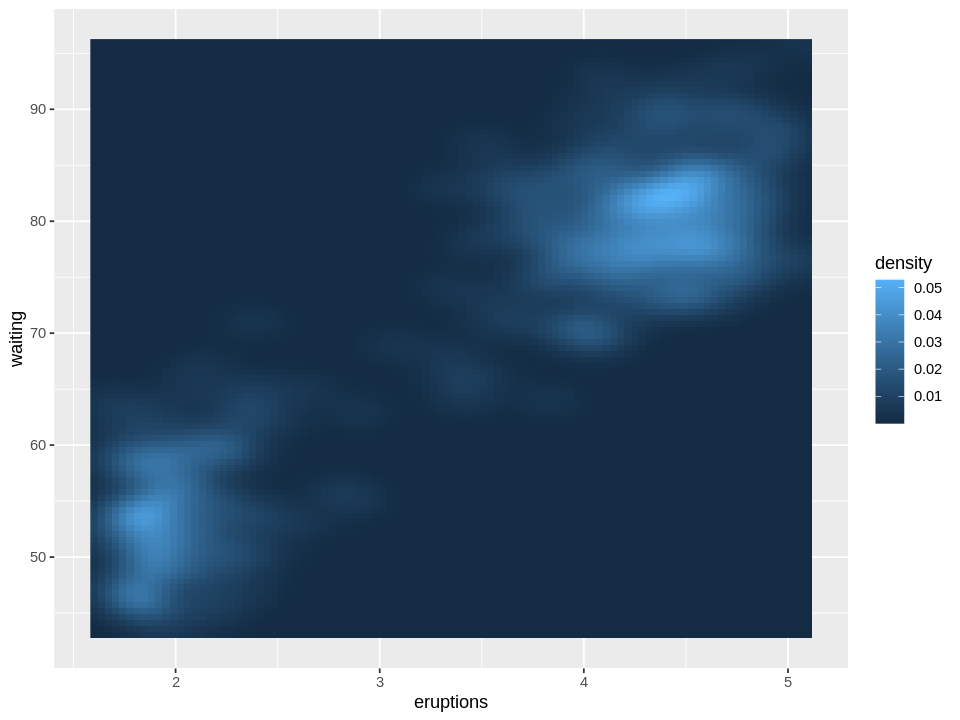

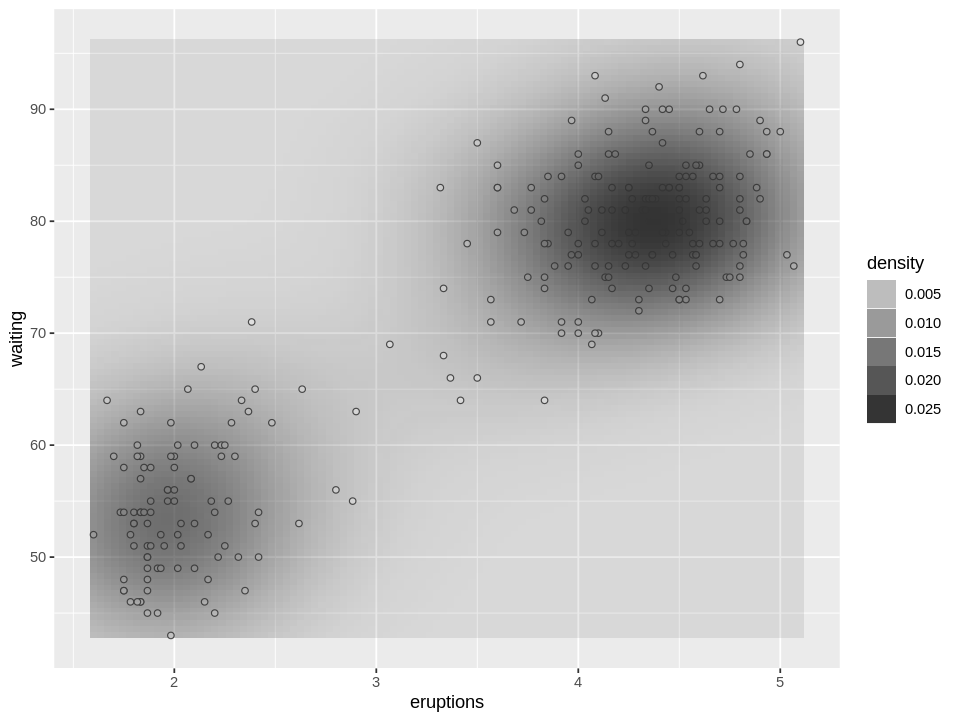

In [17]:
ggplot(faithful, aes(eruptions, waiting)) +
  geom_point(color = "grey60", fill = "white", shape = 21) +
  geom_density2d(aes(color = ..level..)) +
  scale_color_gradient2(high = "white", mid = "brown", midpoint = .015, low = "green")

ggplot(faithful, aes(eruptions, waiting)) +
  stat_density2d(aes(fill = ..density..), contour = FALSE, geom = "raster", h = c(.5, 5))

ggplot(faithful, aes(eruptions, waiting)) +
  geom_point(color = "grey30", fill = "white", shape = 21) +
  stat_density2d(aes(alpha = ..density..), contour = FALSE, geom = "tile")